# Gradient Decent

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples= 4, n_features = 1, n_informative= 1, n_targets= 1, noise = 80, random_state = 13)


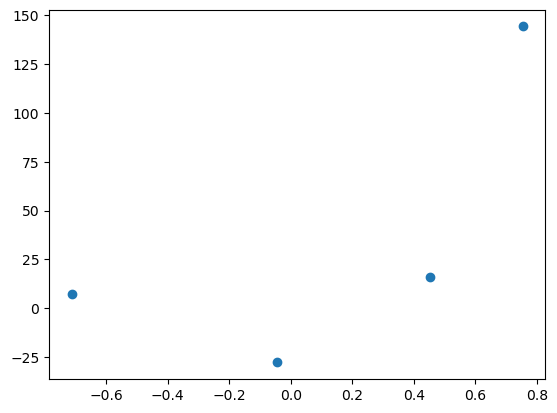

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y);

In [5]:
# Lets apply the OLS

from sklearn.linear_model import LinearRegression 

In [6]:
model1 = LinearRegression()

In [7]:
model1.fit(X, y)

LinearRegression()

In [8]:
model1.coef_


array([78.35063668])

In [10]:
model1.intercept_

26.15963284313262

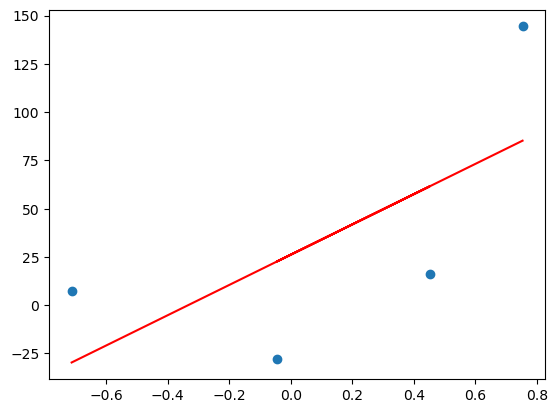

In [11]:
plt.scatter(X, y)
plt.plot(X, model1.predict(X), color ='red')

In [12]:
# Let apply Gradient Decesnt 

y_pred = ((78.35* X) + 0 ).reshape(4)

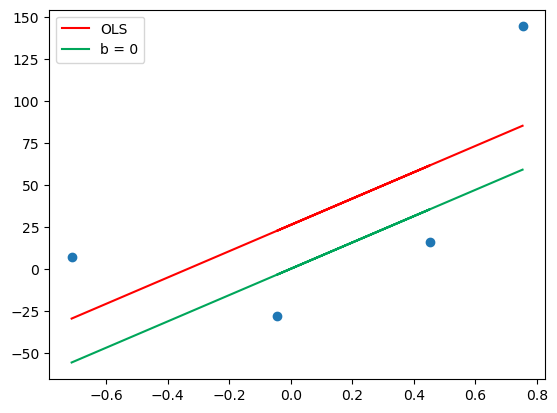

In [14]:
plt.scatter(X, y)
plt.plot(X, model1.predict(X), color ='red', label= 'OLS')
plt.plot(X, y_pred, color = '#00a65a', label = 'b = 0')
plt.legend()
plt.show()

In [15]:
m = 78.35 
b = 0 

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [16]:
# Let taking learning rate = 0.1
lr = 0.1

step_size = loss_slope* lr 
step_size

-20.927763408209216

In [17]:
# New intercept

b = b - step_size

b

20.927763408209216

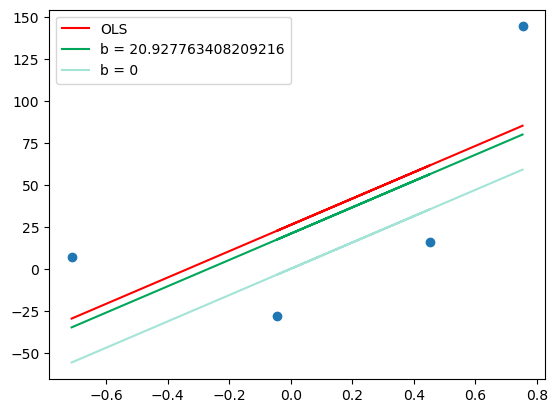

In [18]:
y_pred1 = ((78.35* X) + b ).reshape(4)


plt.scatter(X, y)
plt.plot(X, model1.predict(X), color ='red', label= 'OLS')
plt.plot(X, y_pred1, color = '#00a65a', label = 'b = {}'.format(b))
plt.plot(X, y_pred, color = '#A3E4D7', label = 'b = 0')
plt.legend()
plt.show()


In [19]:
# Iteration 2 
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [20]:
step_size = loss_slope* lr 
step_size

-4.185552681641844

In [21]:
b = b - step_size
b

25.11331608985106

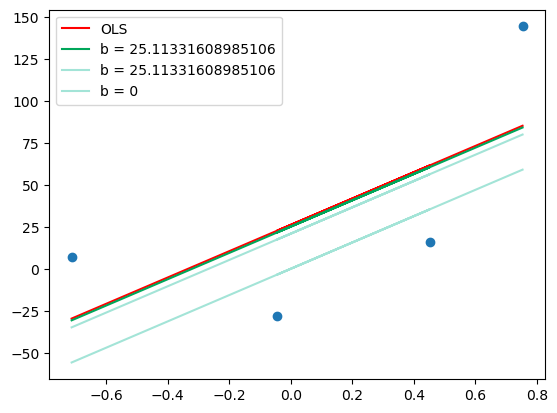

In [22]:
y_pred2 = ((78.35* X) + b ).reshape(4)


plt.scatter(X, y)
plt.plot(X, model1.predict(X), color ='red', label= 'OLS')

plt.plot(X, y_pred2, color = '#00a65a', label = 'b = {}'.format(b))
plt.plot(X, y_pred1, color = '#A3E4D7', label = 'b = {}'.format(b))
plt.plot(X, y_pred, color = '#A3E4D7', label = 'b = 0')
plt.legend()
plt.show()

In [23]:
# Iteration 3 
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [24]:
step_size = loss_slope* lr 
step_size

-0.8371105363283675

In [25]:
b = b - step_size
b

25.95042662617943

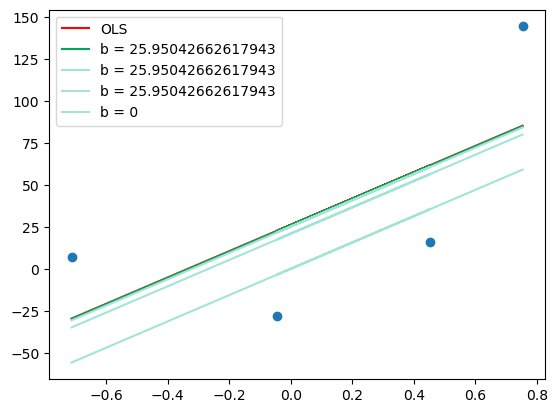

In [26]:
y_pred3 = ((78.35* X) + b ).reshape(4)


plt.scatter(X, y)
plt.plot(X, model1.predict(X), color ='red', label= 'OLS')

plt.plot(X, y_pred3, color = '#00a65a', label = 'b = {}'.format(b))
plt.plot(X, y_pred2, color = '#A3E4D7', label = 'b = {}'.format(b))
plt.plot(X, y_pred1, color = '#A3E4D7', label = 'b = {}'.format(b))
plt.plot(X, y_pred, color = '#A3E4D7', label = 'b = 0')
plt.legend()
plt.show()

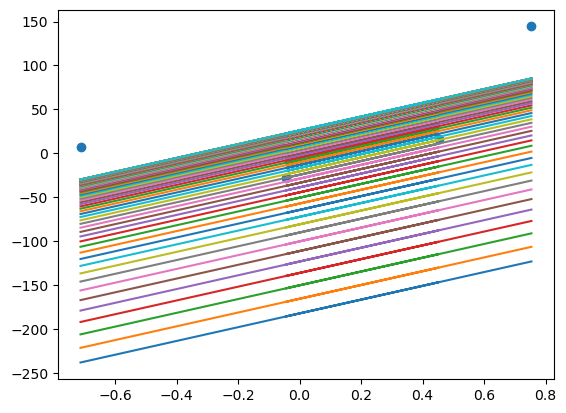

In [32]:
b = -200
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)
    
    y_pred = m * X + b 
    
    plt.plot(X, y_pred)
    
plt.scatter(X, y);
    

#### Applying SGD Regressor 

In [145]:
X, y = make_regression(n_samples= 300, n_features = 1, n_informative= 1, n_targets= 1, noise = 20, random_state = 3)


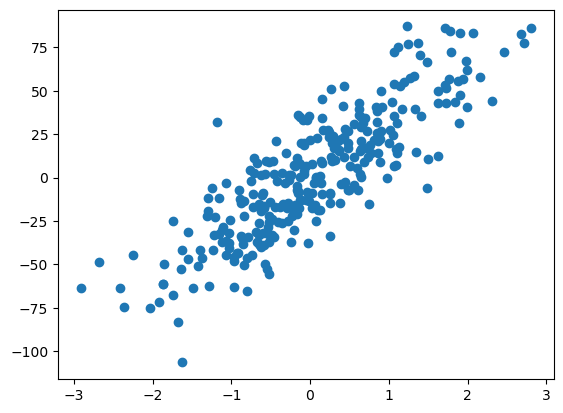

In [146]:
plt.scatter(X, y)

In [147]:
from sklearn.linear_model import LinearRegression

In [149]:
lr = LinearRegression()

In [150]:
lr.fit(X, y)

LinearRegression()

In [151]:
print(lr.coef_)
print(lr.intercept_)

[30.12874586]
0.6377440883938121


In [152]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, X, y, scoring = 'r2', cv=10))

0.7011397824924256

In [153]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120 
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope_b  = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m  = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
            
        print(self.m,self.b)
            
        

In [156]:
gd = GDRegressor(0.001,60)

In [157]:
gd.fit(X, y)

30.128745855433245 0.6377440883938128


In [161]:
X, y = make_regression(n_samples= 300, n_features = 1, n_informative= 1, n_targets= 1, noise = 20, random_state = 3)


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 2)


In [158]:
 from sklearn.linear_model import SGDRegressor 

In [191]:
reg = SGDRegressor(max_iter = 50, learning_rate= 'constant', eta0 = 0.001)

In [192]:
reg.fit(X_train, y_train)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=50)

In [193]:
y_pred = reg.predict(X_test)

In [194]:
from sklearn.metrics import  r2_score
r2_score(y_test, y_pred)

0.6654329037366278

#### Applying mini batch gradient 

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
X, y = load_diabetes(return_X_y= True)

In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 3)


In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
y_predict = reg.predict(X_test)

In [10]:
r2_score(y_test, y_predict)

0.43862187337165937

In [11]:
print(reg.coef_)
print(reg.intercept_)


[-3.52815107e-01 -2.87155875e+02  5.40993163e+02  3.29302111e+02
 -5.38843400e+02  2.12601930e+02  1.04014291e+01  2.35046327e+02
  5.98119178e+02  1.00428424e+02]
153.58195762316092


In [12]:
from sklearn.linear_model import SGDRegressor

In [49]:
sgd1 = SGDRegressor(learning_rate = 'constant', eta0= 0.05)

In [50]:
import random
batch_size = 120

for i in range(100):
    
    idx = random.sample(range(X_train.shape[0]), batch_size)
    sgd1.partial_fit(X_train[idx], y_train[idx])

In [51]:
 y_pred = sgd1.predict(X_test)

In [52]:
r2_score(y_test, y_pred)

0.4155154801240003